# Exploring Bias in Fandango Movie Ratings

## Introduction

This project explores data on Fandango movie ratings, for which Walt Hickey found [strong evidence](https://fivethirtyeight.com/features/fandango-movies-ratings/) in 2015 of bias in displayed ratings on their website. The aim of this project is to produce some statistical analysis on some recent Fandango data with comparison to Walt's 2015 data to see if there has been a significant change to Fandango's rating system.

[Walt Hickey 2015 Data Source](https://github.com/fivethirtyeight/data/tree/master/fandango) and [data dictionary](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md).

[2016-2017 Data Source](https://github.com/mircealex/Movie_ratings_2016_17) and [data dictionary](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md).

## Initial Data Exploration

In [51]:
# set up inline matplotlib plotting on a retina screen
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [74]:
import pandas as pd

data_2015 = pd.read_csv('./fandango_score_comparison.csv')
data_16_17 = pd.read_csv('./movie_ratings_16_17.csv')

fandango_2015 = data_2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_16_17 = data_16_17[['movie', 'year', 'fandango']]

# extract production year from film titles
print(fandango_2015['FILM'].str.extract(r'\(([12][0-9]{3})\)').iloc[:,0].value_counts())

2015    129
2014     17
Name: 0, dtype: int64


The population of interest is all movie ratings on the [Fandango](https://www.fandango.com/) website regardless of release date. Walt Hickey's 2015 data supposedly contains every movie that has ratings across multiple film review websites and a minimum of 30 fan reviews on Fandango, as of 24th August 2015. However, the data seems to only contain films released in 2015, or perhaps the year leading up to 24th August 2015, though this is not clarified in the article; the films in the data set are only in release/production years 2014 and 2015. The constraints on minimum fan review numbers, presence across multiple review websites, and time scope means that this sample on its own is not representative of the population.

The supplementary 2016-2017 movie rating data contains data for "214 of the most popular movies (with a significant number of votes)"; 'significant' is not defined, so there is ambiguity on this constraint. Nevertheless it is a constraint that reduces the representativity of this sample for the population. As for the previous data set, there is also a constraint on film release/production years that only makes this representative of a subset of the population.

Both sets of data are purposive sampling in that they were produced with specific research questions in mind and used some judgement in their selection. While useful for their original purposes, they are not representative of all Fandango movie ratings, either individually or in combination.

In order to proceed, additional data can be collected or the population of interest can be reframed. Revisiting the purpose of this project, exploring bias in Fandango movie ratings and changes to its rating system, the latter approach would be preferable. Considering a population of Fandango movie ratings for _popular_ films could be a suitable proxy for the main population and makes the two data sets relevant for analysis; ratings for popular films would certainly have a larger influence on spending decisions of consumers of this movie rating information than for less popular films.

The analysis hereafter will consider the below two population subsets for Fandango movie ratings:

- Ratings for popular films (greater than 30 fan reviews) released during or before 2015
- Ratings for popular films released in 2016 or 2017
    - It is assumed that the 2016-2017 data set is equivalent to one with greater than 30 fan reviews, though it is acknowledged that this is a somewhat arbitrary assumption.

## Plotting Distributions

### KDE Distributions

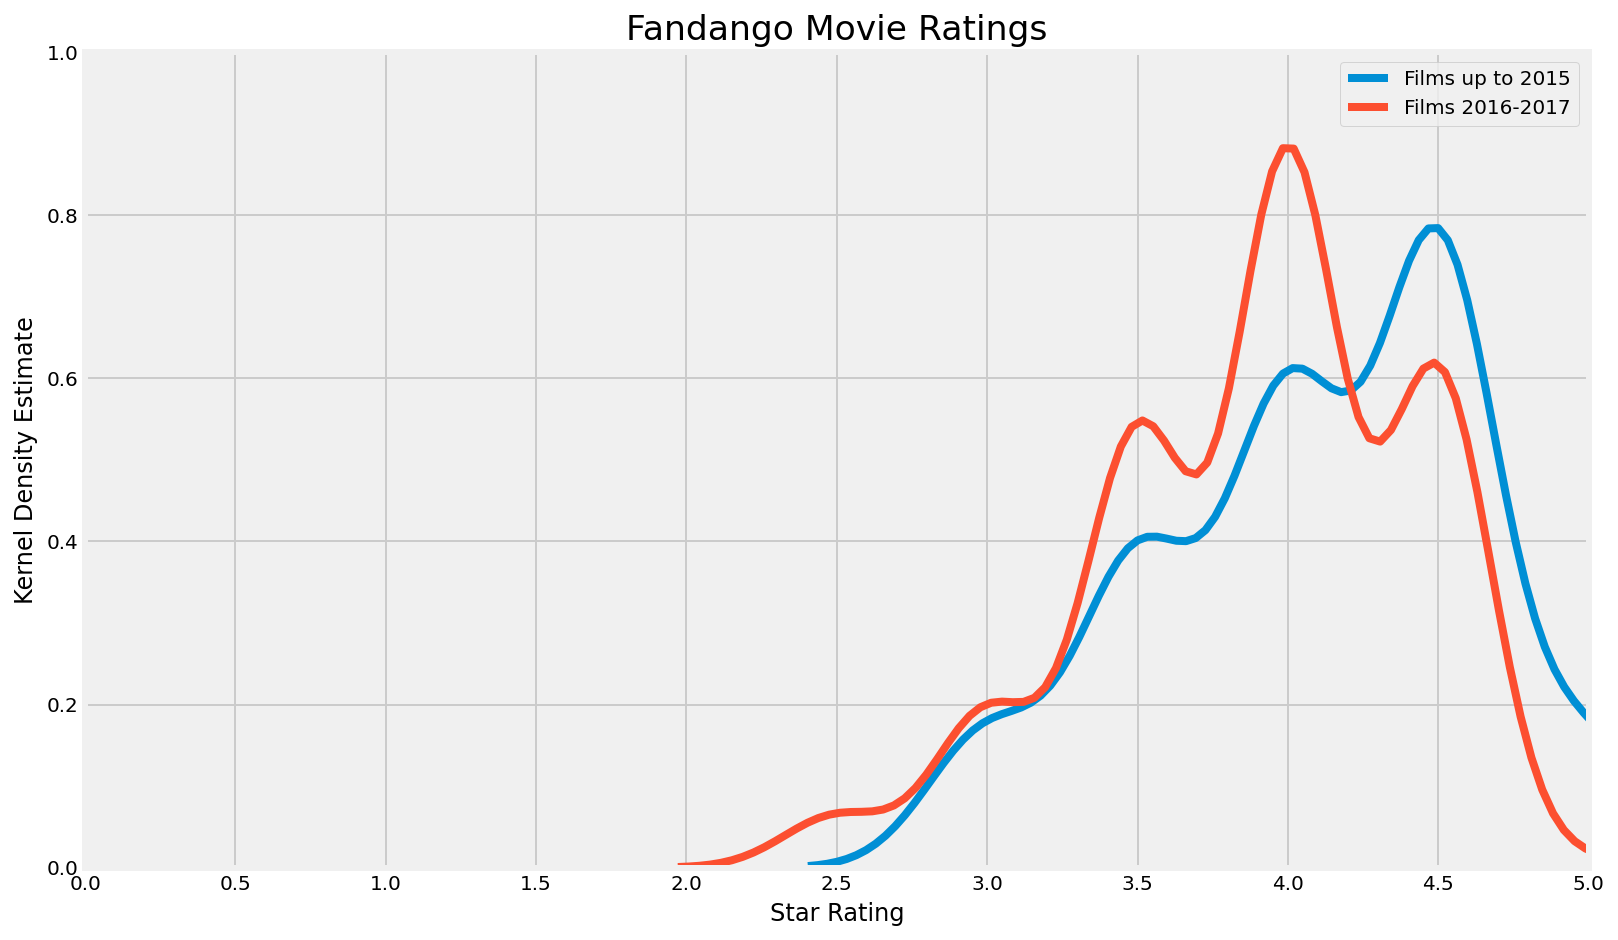

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot KDE plots for both data sets
plt.figure(figsize=(12, 7.5))
sns.kdeplot(fandango_2015['Fandango_Stars'], label='Films up to 2015')
sns.kdeplot(fandango_16_17['fandango'], label='Films 2016-2017')
plt.title('Fandango Movie Ratings', fontsize='xx-large')
plt.xlabel('Star Rating')
plt.ylabel('Kernel Density Estimate')
plt.axis([0, 5, 0, 1])
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

- Both distributions show negative skew.
- 2016-2017 data shows less negative skew, indicating a step change in review system. Reviews generally have a slightly lower rating after 2015.

### Frequency Tables and Bar Chart

In [54]:
star_freq_2015 = fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()
star_freq_2015

3.0    0.082192
3.5    0.184932
4.0    0.280822
4.5    0.376712
5.0    0.075342
Name: Fandango_Stars, dtype: float64

In [55]:
star_freq_16_17 = fandango_16_17['fandango'].value_counts(normalize=True).sort_index()
star_freq_16_17

2.5    0.028037
3.0    0.084112
3.5    0.233645
4.0    0.383178
4.5    0.266355
5.0    0.004673
Name: fandango, dtype: float64

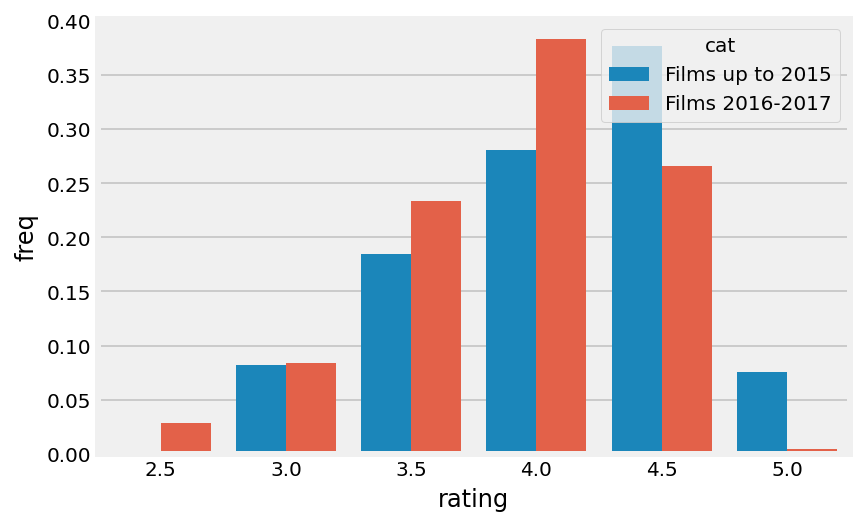

In [61]:
cols = ['rating', 'freq', 'cat']
star_freq_1 = pd.DataFrame(star_freq_2015.reset_index())
star_freq_1['cat'] = 'Films up to 2015'
star_freq_2 = pd.DataFrame(star_freq_16_17.reset_index())
star_freq_2['cat'] = 'Films 2016-2017'
star_freq_1.columns = cols
star_freq_2.columns = cols
star_freq = pd.concat([star_freq_1, star_freq_2]).reset_index(drop=True)
sns.barplot(data=star_freq, x='rating', y='freq', hue='cat')
plt.show()

In line with the KDE plot, the normalised frequency distribution tables (plotted also in a bar chart) show that after 2015 movie ratings appear to have shifted to lower ratings in general.

### Summary Statistics

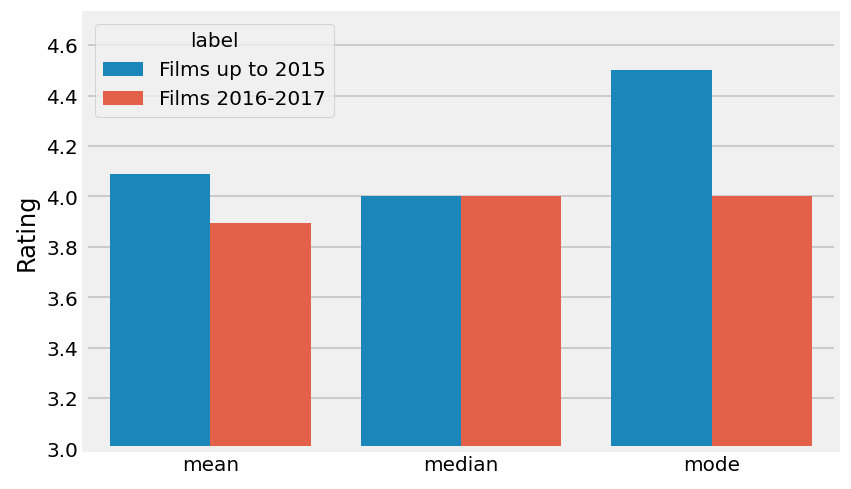

In [70]:
def summary_statistics(ratings, name):
    stat_labels = ['mean', 'median', 'mode']
    stats = [ratings.mean(), ratings.median(), ratings.mode()]
    label = [name, name, name]
    summary_stats = pd.DataFrame({
        'stat_type': stat_labels,
        'stats': stats,
        'label': label
    })
    return summary_stats

summary_stats = pd.concat([
    summary_statistics(fandango_2015['Fandango_Stars'], 'Films up to 2015'),
    summary_statistics(fandango_16_17['fandango'], 'Films 2016-2017')
]).reset_index(drop=True)

sns.barplot(x='stat_type', y='stats', hue='label', data=summary_stats)
plt.xlabel('')
plt.ylabel('Rating')
plt.ylim(bottom=3)
plt.show()

Both the mean and mode ratings have reduced post 2015, while the median as remained the same. This suggests that the distribution of ratings remains centred around the same rating of 4.0, while the magnitude of negative skew has reduced. This is also indicated in the KDE plot and normalised frequency distribution analysis above.

## Conclusion
Looking at the data sets from different statistical angles, it appears that in general ratings for popular movies on the Fandango website have seen a reduction in mean and in the magnitude of negative skew after the year 2015. This is potentially in response to the 2015 Walt Hickey article on FiveThirtyEight suggesting strong evidence of inflation of film ratings.